<a href="https://colab.research.google.com/github/gkkhnyldz/CRM/blob/main/Kaggle_VeriBilimiG%C3%B6rselle%C5%9Ftirme_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0.5, 1.0, 'Top Selling Products')

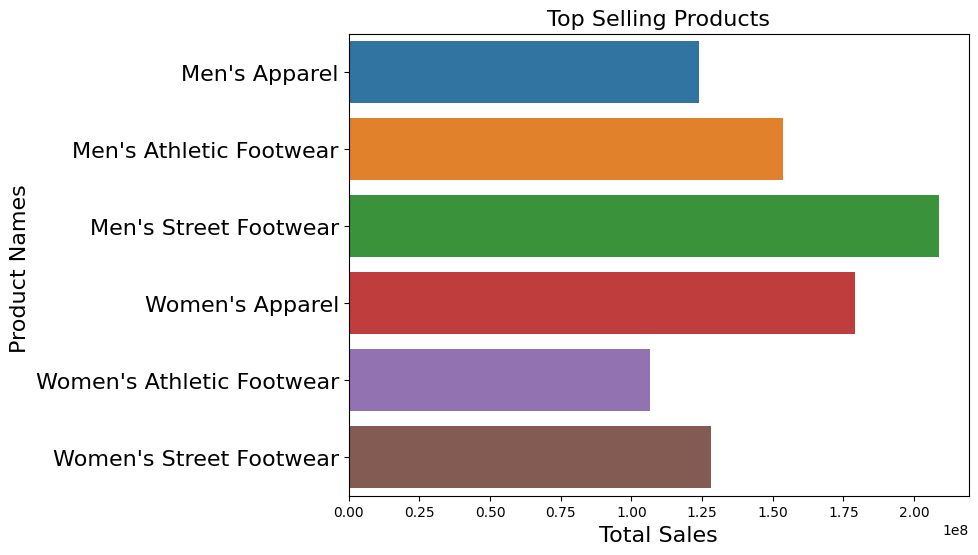

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

from sklearn import tree

import pandas as pd
import io

df = pd.read_csv('/content/adidas.csv')
df.head()

# delete first column
df = df.drop('Unnamed: 0',axis=1)
df.head()

top_selling_products = df.groupby('Product')['Total Sales'].sum().reset_index() #group by products and apply sum function on Total Sales Column
top_selling_products.index+=1 # the index starts from 0 by default so we plus 1 in index here
top_selling_products


fig , ax = plt.subplots(figsize=(8,6))

sns.barplot(data = top_selling_products,y= 'Product',x ='Total Sales')
ax.set_yticklabels(ax.get_yticklabels() , fontsize = 16)

ax.set_xlabel(' Total Sales ', fontsize = 16)
ax.set_ylabel('Product Names ', fontsize = 16)
ax.set_title('Top Selling Products', fontsize = 16)



In [ ]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


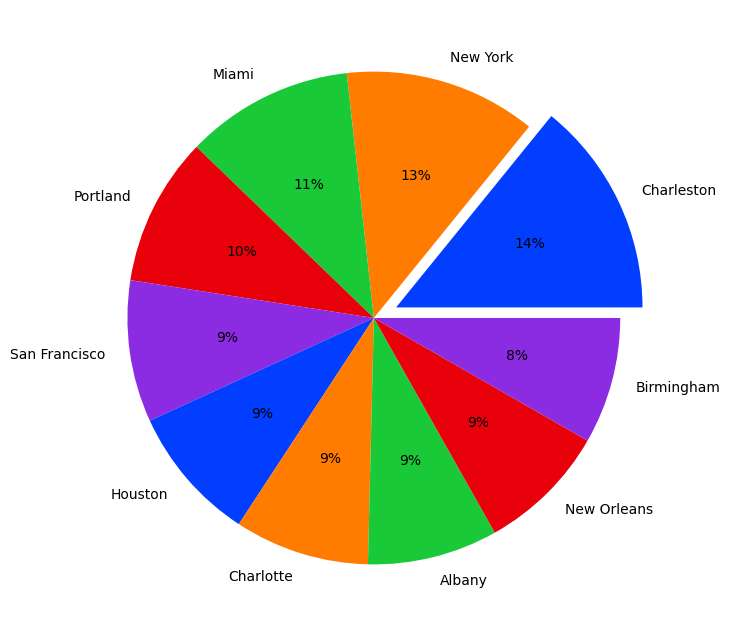

In [ ]:

top_grossing = df.groupby('City')['Operating Profit'].sum().sort_values(ascending = False).reset_index().head(10)
top_grossing.index+=1
top_grossing


data= list(top_grossing['Operating Profit']) #convert Operating Profit series in a list
labels = list(top_grossing['City']) #convert city series in a list
fig , ax = plt.subplots(figsize=(10,8))

colors = sns.color_palette('bright')[0:5]
plt.pie(data, labels = labels,colors = colors, autopct='%.0f%%', explode = (0.1, 0,0,0,0,0,0,0,0,0))
plt.show()

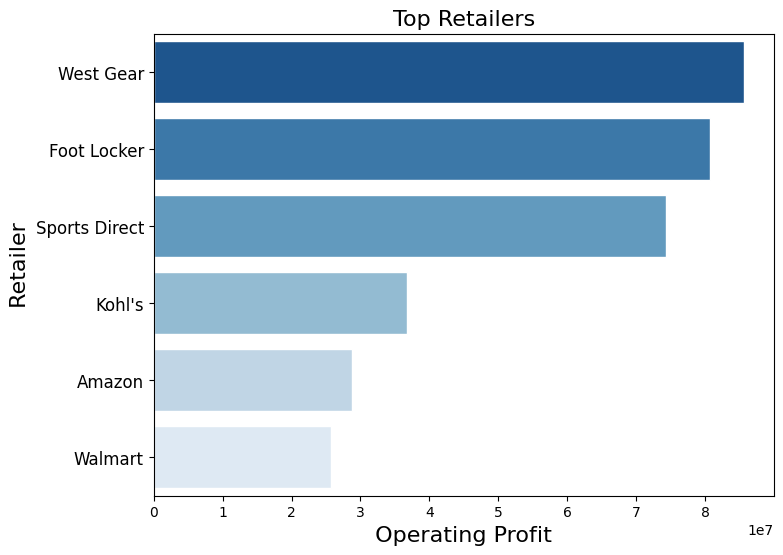

In [ ]:
top_retailors = df.groupby('Retailer')['Operating Profit'].sum().sort_values(ascending=False).reset_index().head(10)
top_retailors.index += 1
top_retailors


fig , ax = plt.subplots(figsize=(8,6))
sns.set(style='darkgrid')
sns.barplot(data=top_retailors, x='Operating Profit', y='Retailer', palette='Blues_r')
ax.set_yticklabels(ax.get_yticklabels() , fontsize = 12)
ax.set_xlabel(' Operating Profit ', fontsize = 16)
ax.set_ylabel(' Retailer ', fontsize = 16)
ax.set_title('Top Retailers', fontsize = 16)
plt.show()


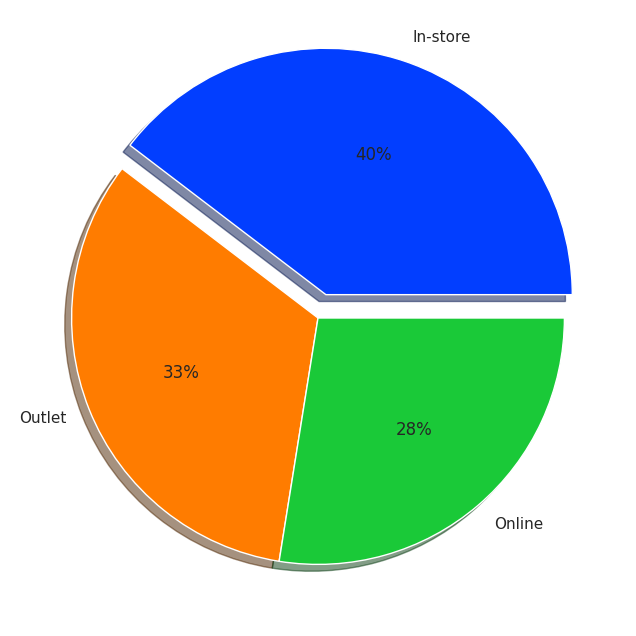

In [ ]:
top_methods = df.groupby('Sales Method')['Total Sales'].sum().sort_values(ascending=False).reset_index()
#for pie chart we need 2 lists
data= list(top_methods['Total Sales']) #convert Operating Profit series in a list
labels = list(top_methods['Sales Method'])
fig , ax = plt.subplots(figsize=(10,8))

colors = sns.color_palette('bright')[0:5]
plt.pie(data, labels = labels,colors = colors, autopct='%.0f%%', explode = (0.1, 0,0), shadow =True)
plt.show()


<ipython-input-14-48504787d054>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)


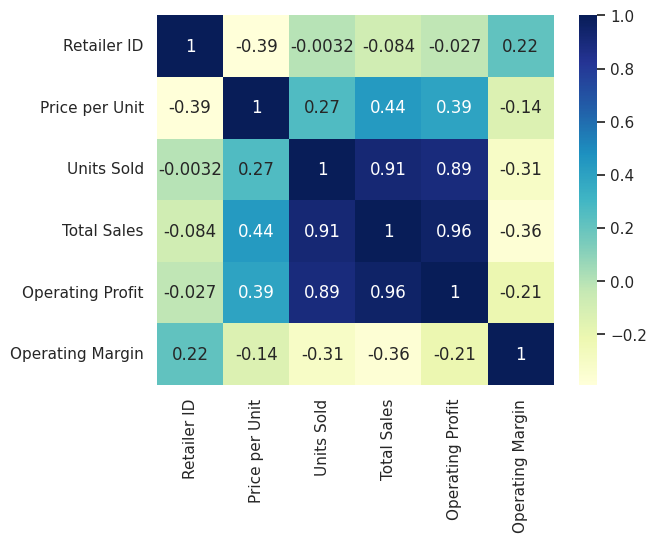

In [ ]:
# Let's see the correlation between different variables.
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()



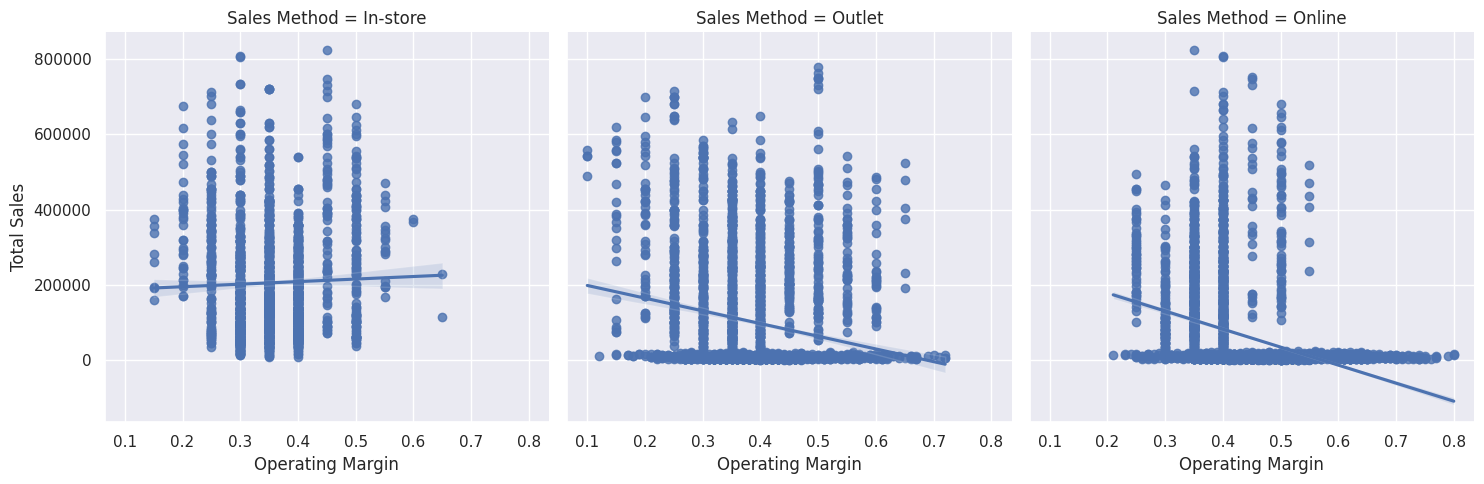

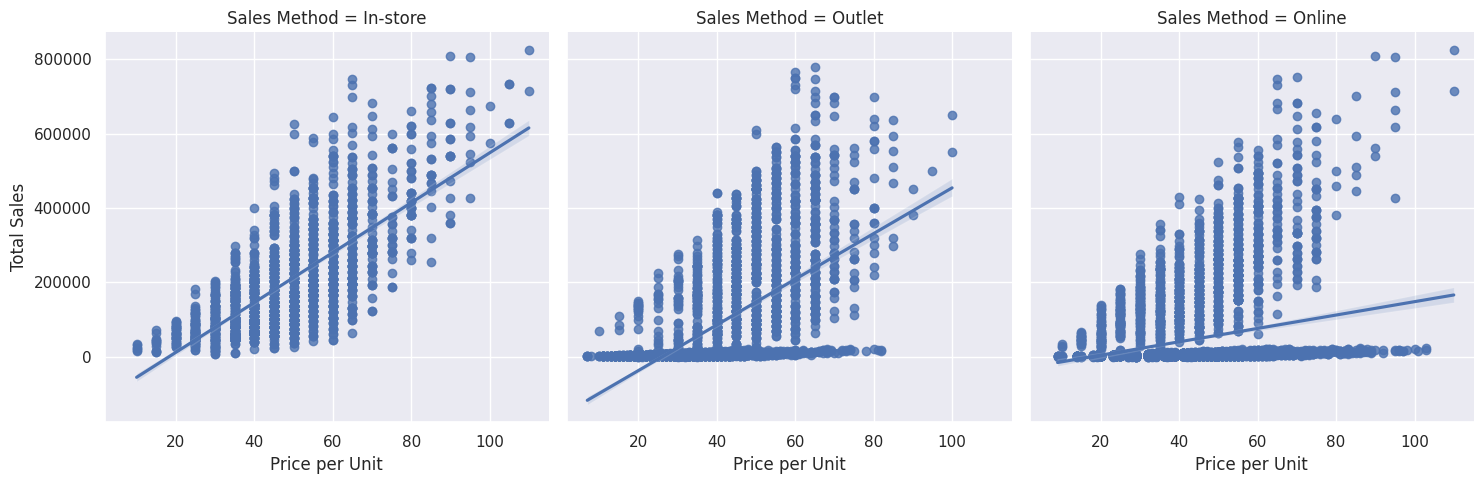

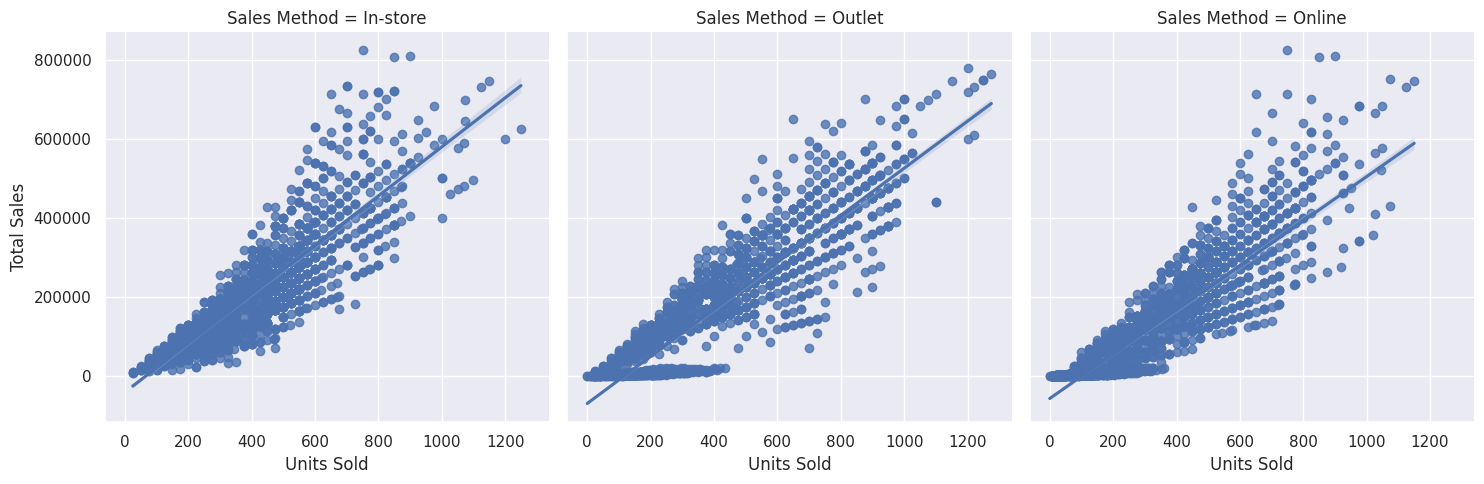

In [ ]:

sns.lmplot(data = df, x ='Operating Margin',y = 'Total Sales',col ='Sales Method')

sns.lmplot(data = df, x ='Price per Unit',y = 'Total Sales',col ='Sales Method')

sns.lmplot(data = df, x ='Units Sold',y = 'Total Sales',col ='Sales Method')


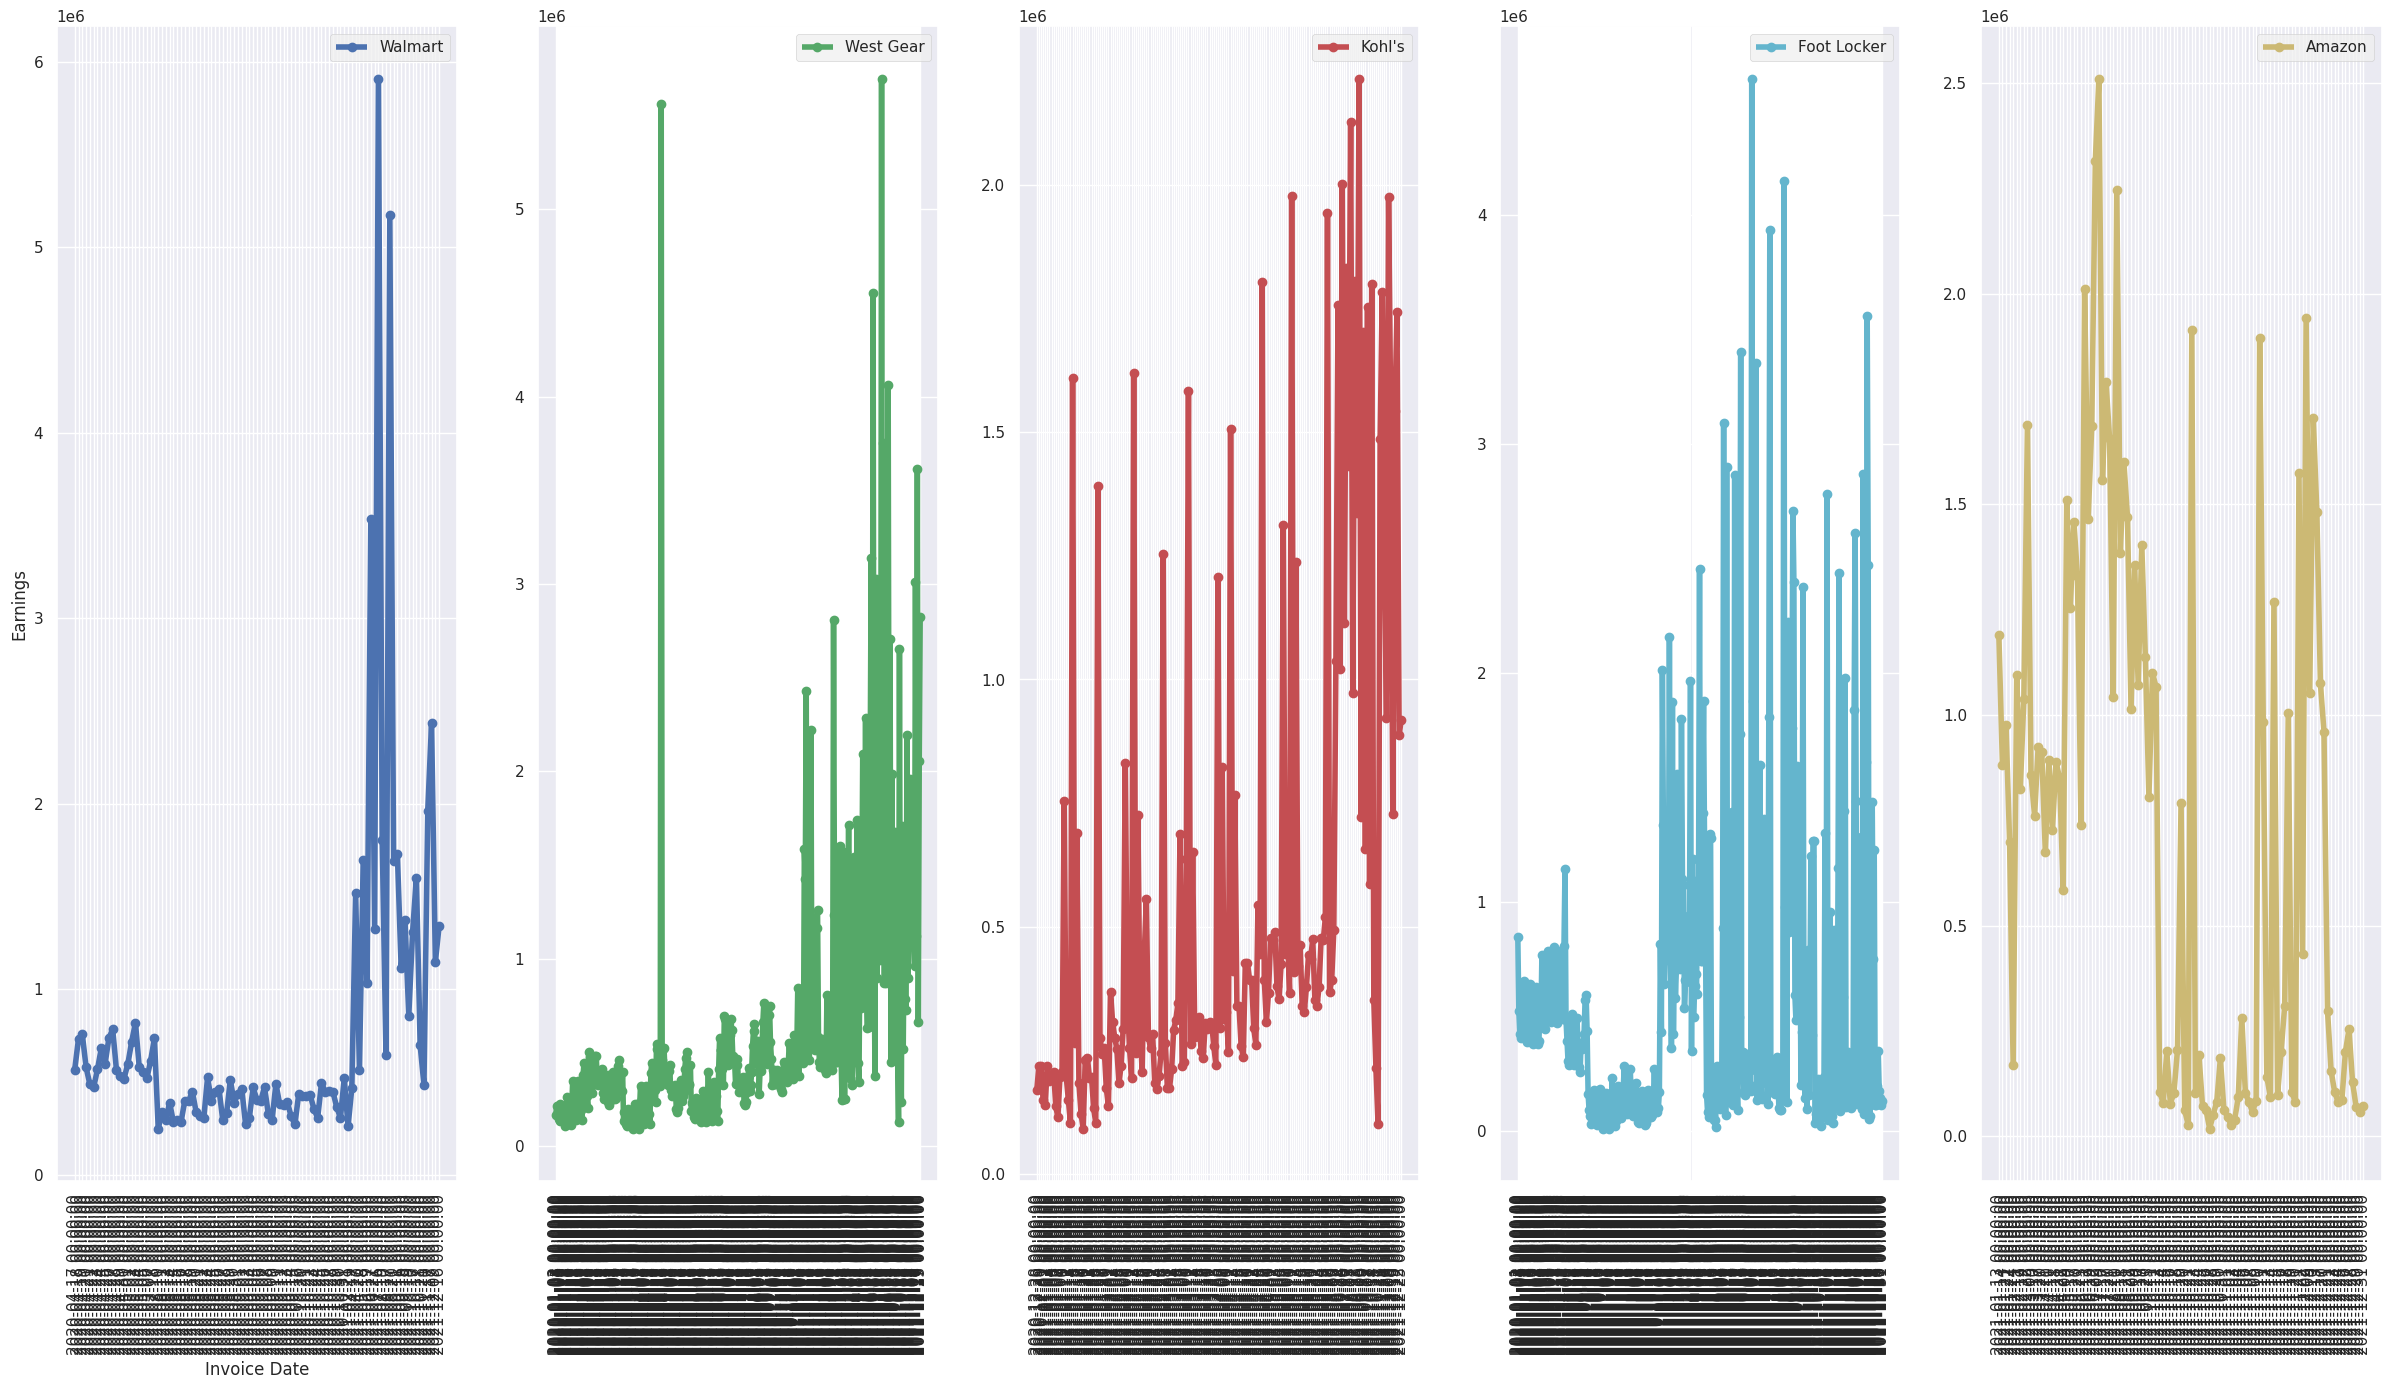

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

#looking at earning over time for each retailer to spot macro trends
df_group = df.groupby(['Retailer', 'Invoice Date'])['Total Sales'].sum()
df_group = df_group.reset_index()



walmart = df_group[df_group['Retailer'] == 'Walmart']
xwalmart = walmart['Invoice Date']
ywalmart = walmart['Total Sales']

amazon = df_group[df_group['Retailer'] == 'Amazon']
xamazon = amazon['Invoice Date']
yamazon = amazon['Total Sales']

westgear = df_group[df_group['Retailer'] == 'West Gear']
xwestgear = westgear['Invoice Date']
ywestgear = westgear['Total Sales']

kohl = df_group[df_group['Retailer'] == 'Kohl\'s']
xkohl = kohl['Invoice Date']
ykohl = kohl['Total Sales']

footlocker = df_group[df_group['Retailer'] == 'Foot Locker']
xfl = footlocker['Invoice Date']
yfl = footlocker['Total Sales']

fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=1, ncols=5)
plt.gcf().set_size_inches(30,15)
plt.style.use('fivethirtyeight')


ax1.plot_date(xwalmart, ywalmart, linestyle = 'solid', label='Walmart')
ax2.plot_date(xwestgear, ywestgear, linestyle = 'solid', label='West Gear', c='g')
ax3.plot_date(xkohl, ykohl, linestyle = 'solid', label='Kohl\'s', c='r')
ax4.plot_date(xfl, yfl, linestyle = 'solid', label='Foot Locker', c='c')
ax5.plot_date(xamazon, yamazon, linestyle = 'solid', label='Amazon', c='y')
ax1.set_xlabel('Invoice Date')
ax1.set_ylabel('Earnings')
ax1.legend()
ax1.tick_params(axis='x', rotation=90)



ax2.legend()
ax2.tick_params(axis='x', rotation=90)



ax3.legend()
ax3.tick_params(axis='x', rotation=90)


ax4.legend()
ax4.tick_params(axis='x', rotation=90)


ax5.legend()
ax5.tick_params(axis='x', rotation=90)
plt.show()


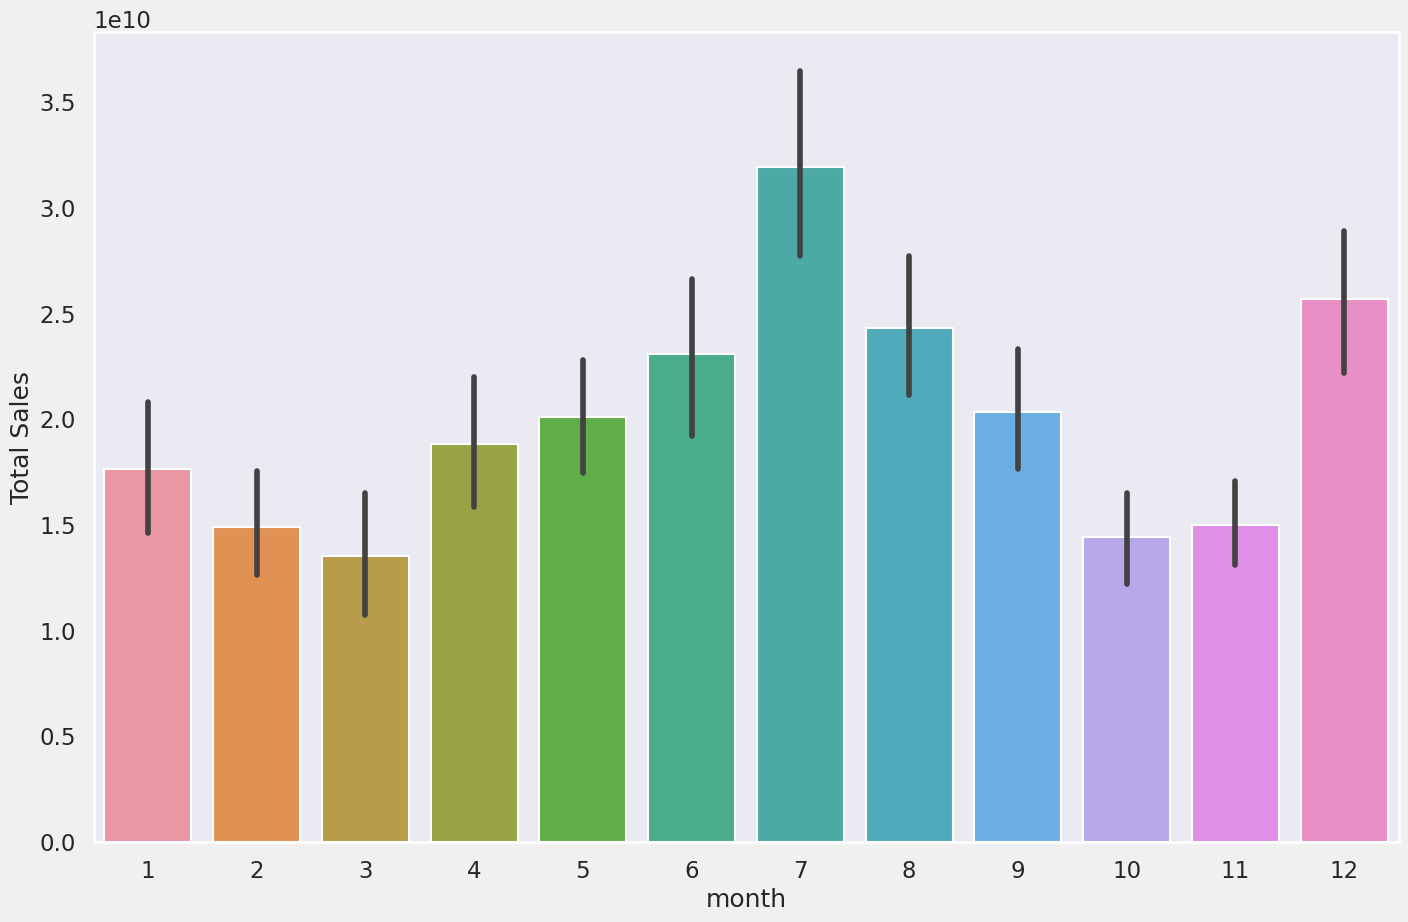

In [ ]:

# Create a new column for dates from 'Invoice Date'
df['year'] = pd.to_datetime(df['Invoice Date']).dt.year
df['month'] = pd.to_datetime(df['Invoice Date']).dt.month
df['day'] = pd.to_datetime(df['Invoice Date']).dt.day
df['date'] = pd.to_datetime(df['Invoice Date'])


#examaning groupby frame for montly sales chart below
df_group = df.groupby(['Retailer', 'month'])['Total Sales'].sum()
df_group = df_group.reset_index()
df_group

#seasonality of sales
plt.figure(figsize=(15,10))
sns.set_style('dark')
sns.set_context('talk')
sns.barplot(x='month', y='Total Sales', data=df, dodge=True, estimator=np.var)
plt.show()


<ipython-input-18-3bee942bc529>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


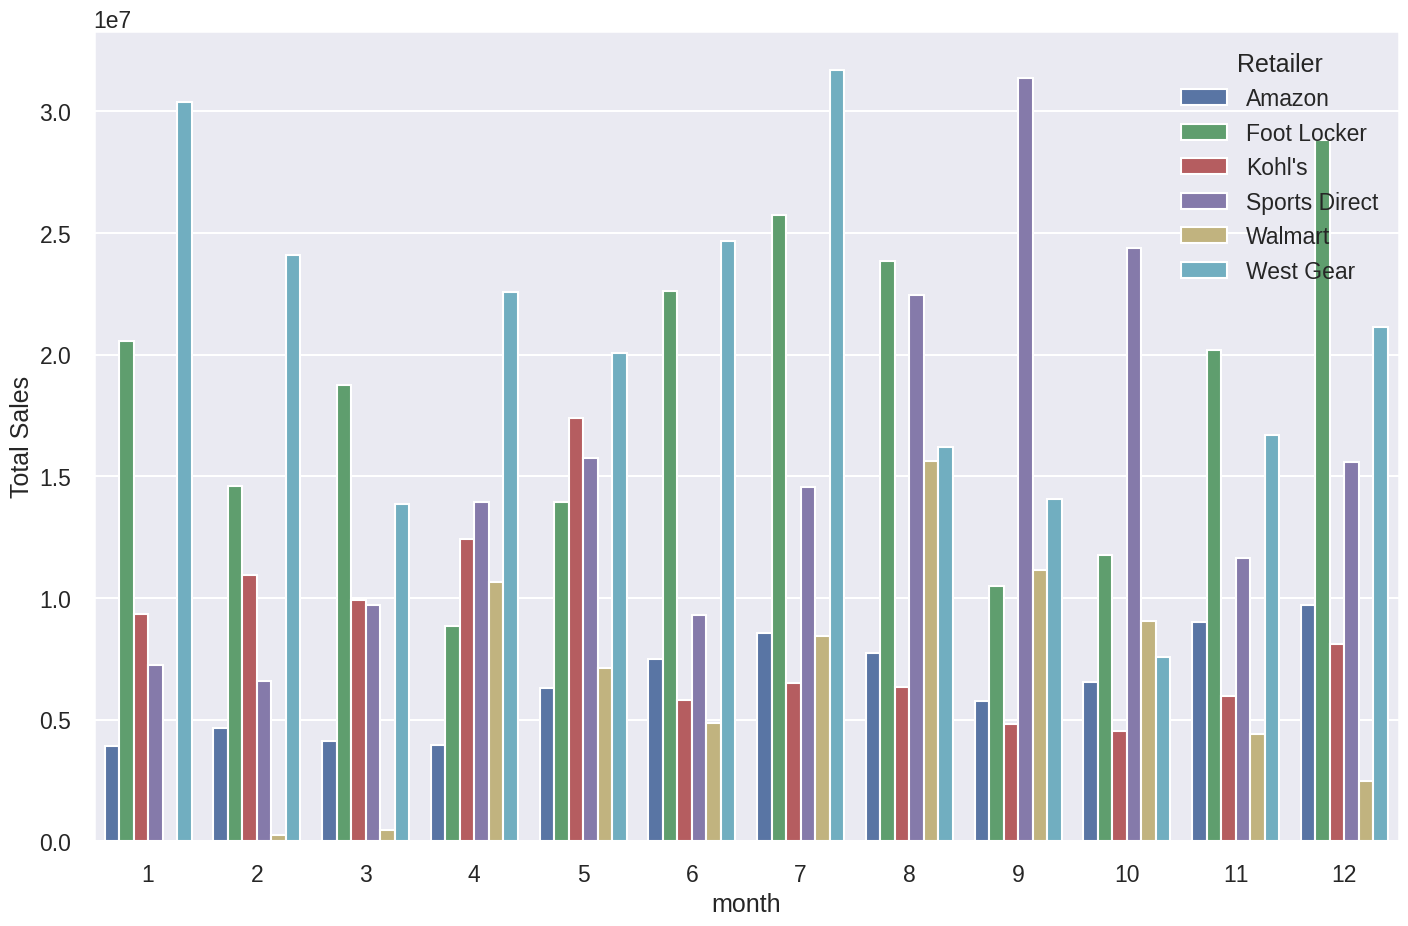

In [ ]:
#testing seasononlity of sales being independently true for each retailer
plt.figure(figsize=(15,10))
plt.style.use("seaborn")
sns.set_context('talk')
sns.barplot(x='month', y='Total Sales', data=df_group, hue='Retailer', dodge=True)
plt.show()


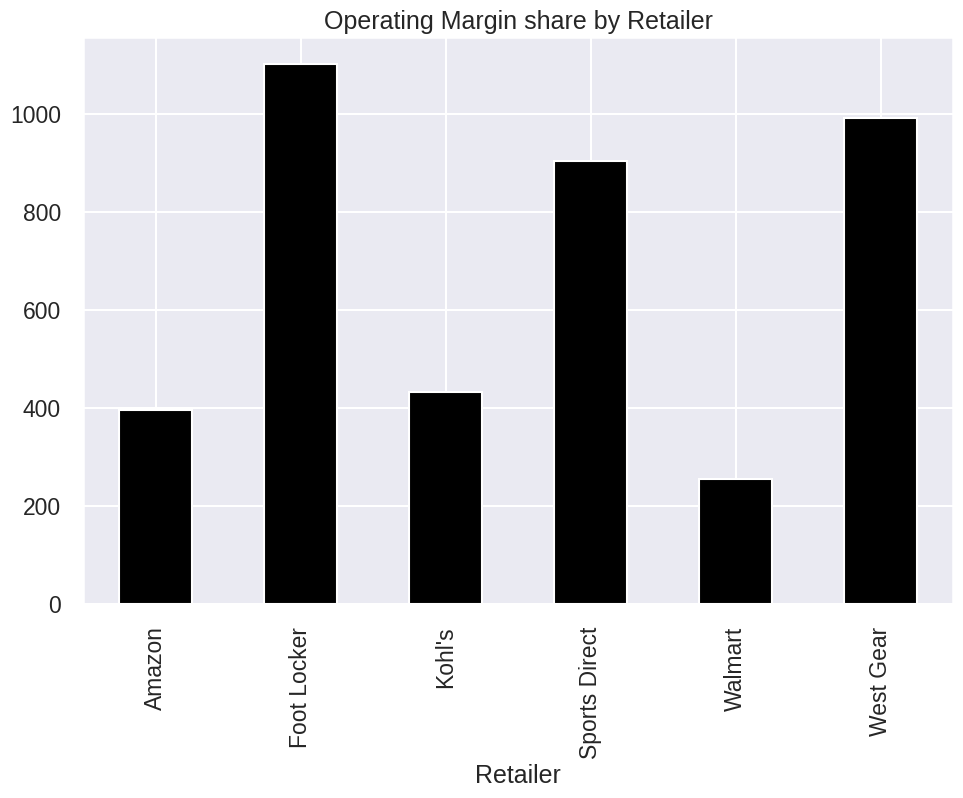

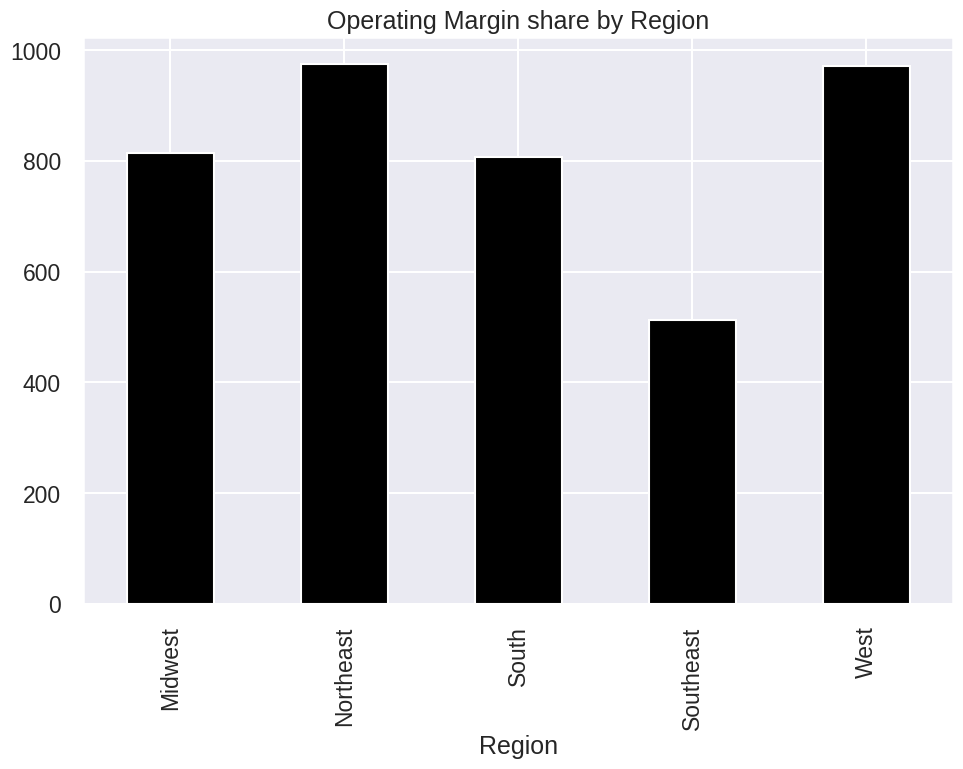

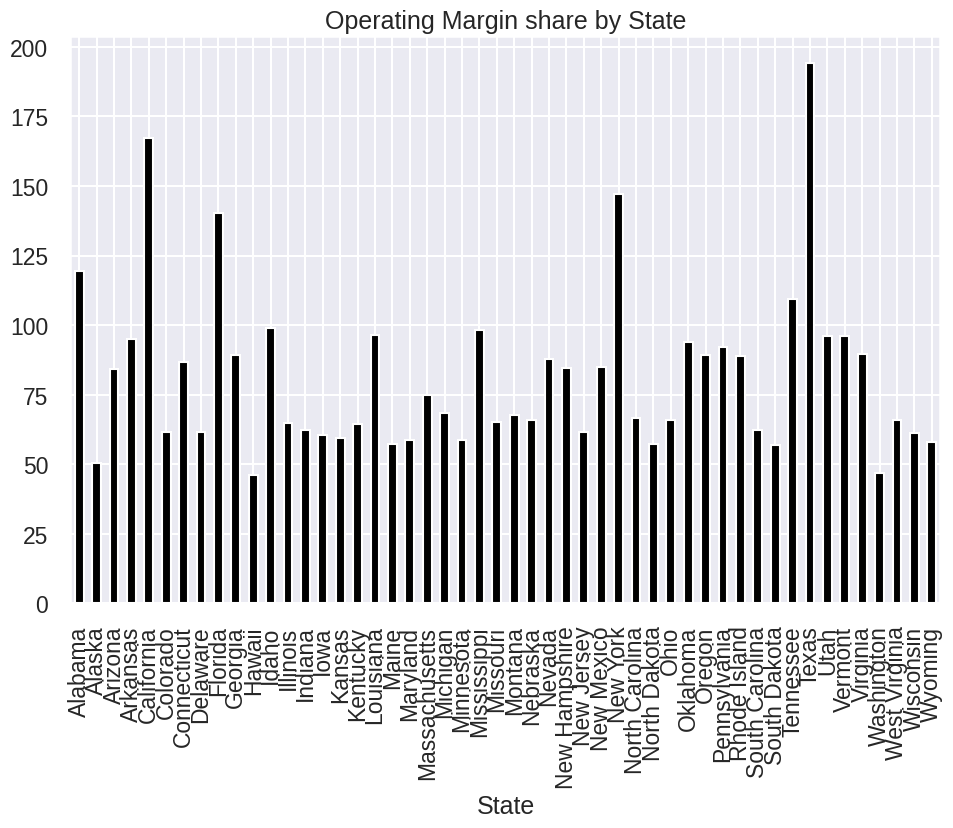

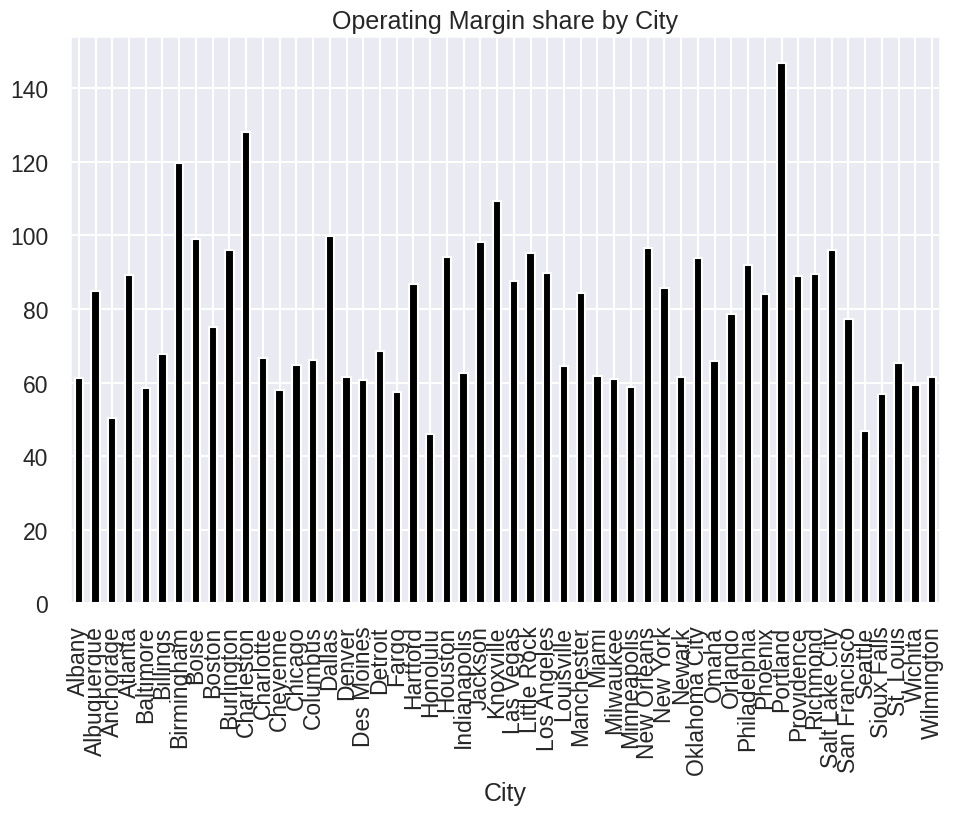

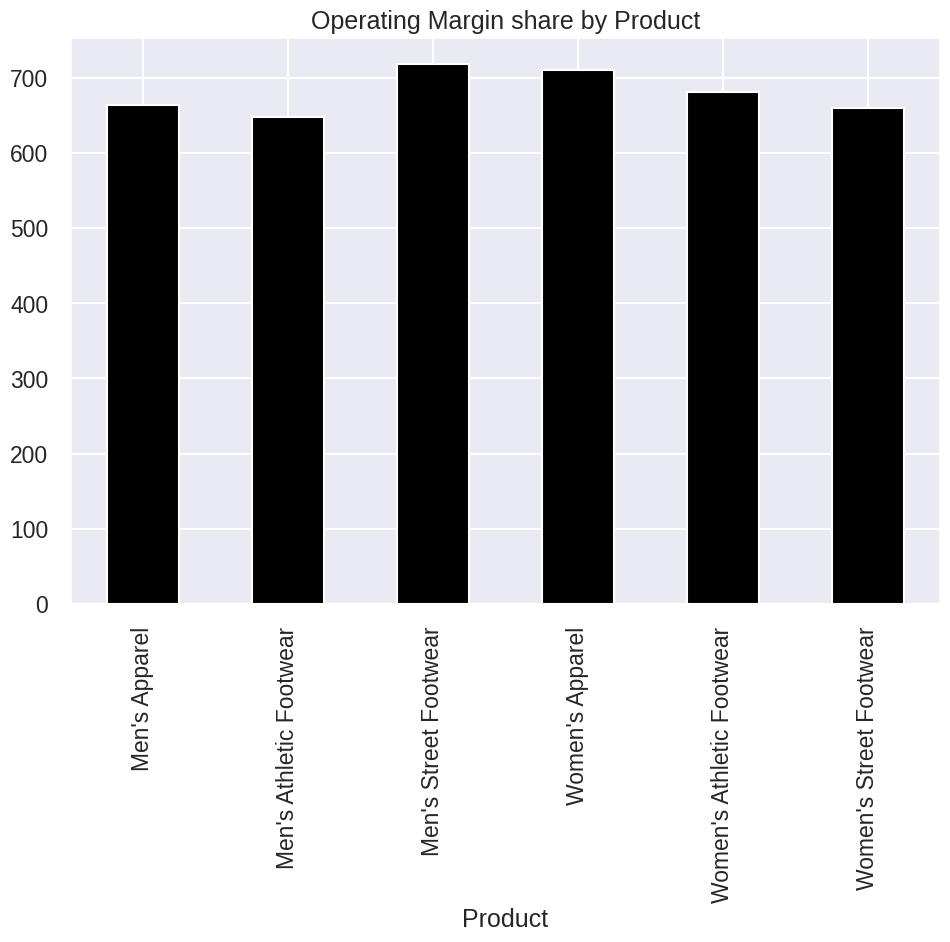

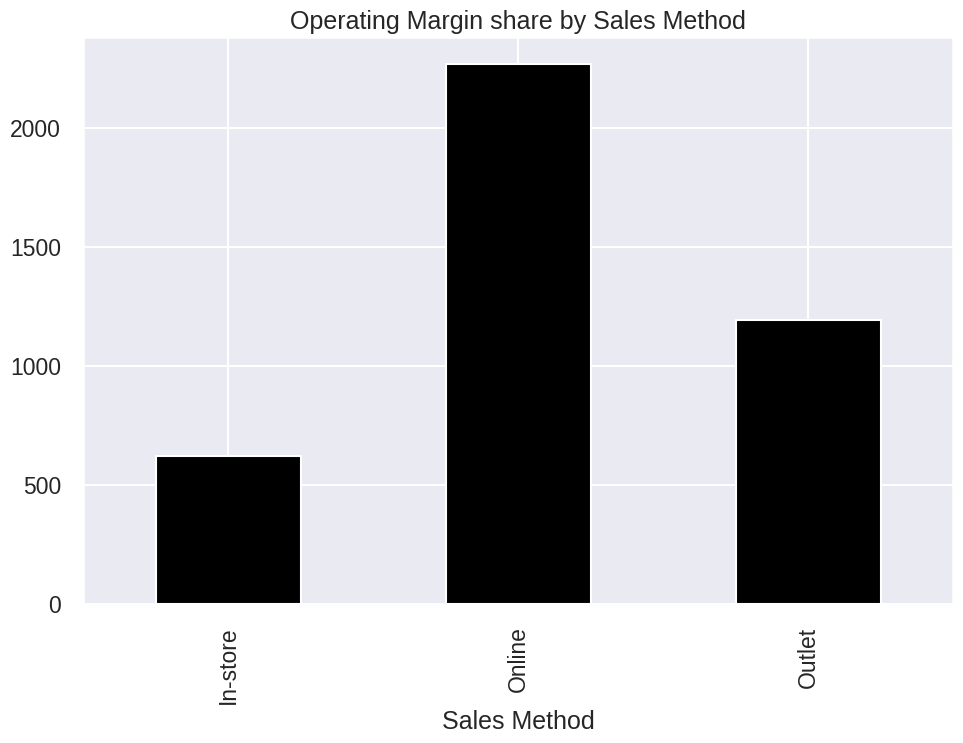

In [ ]:


#EDA Operating Margin analysis by seller, region city etc
category=['Retailer','Region','State','City','Product','Sales Method']
for col in category:
    best=df[[col,'Operating Margin']].groupby(col).sum()
    best.plot(kind='bar',figsize=(10,7),title='Operating Margin share by '+col,legend=False,colormap='gnuplot2')




<ipython-input-8-f125680f3b96>:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




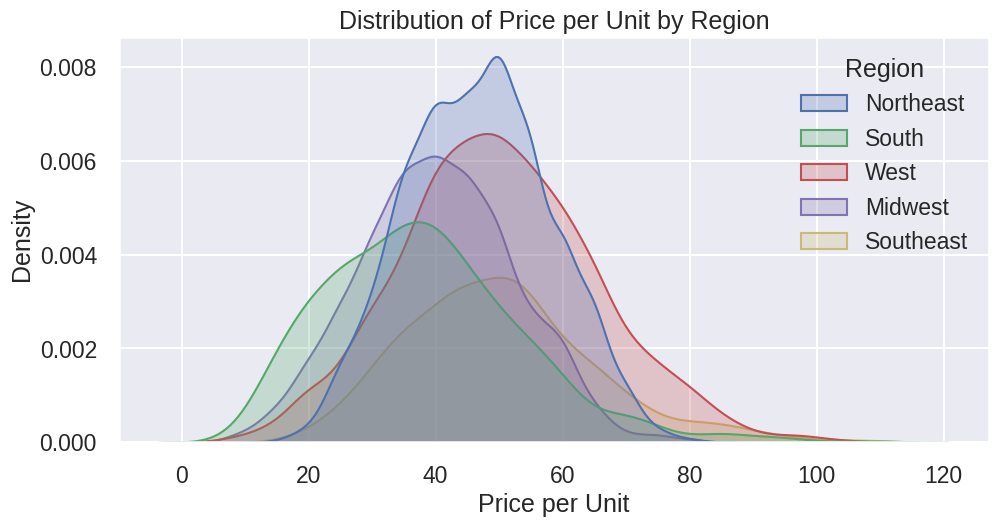

<ipython-input-8-f125680f3b96>:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




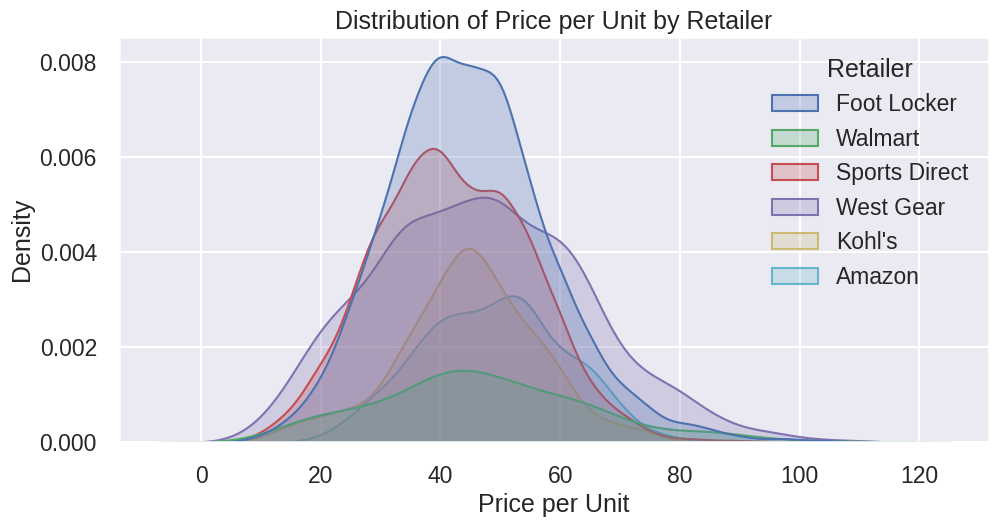

<ipython-input-8-f125680f3b96>:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




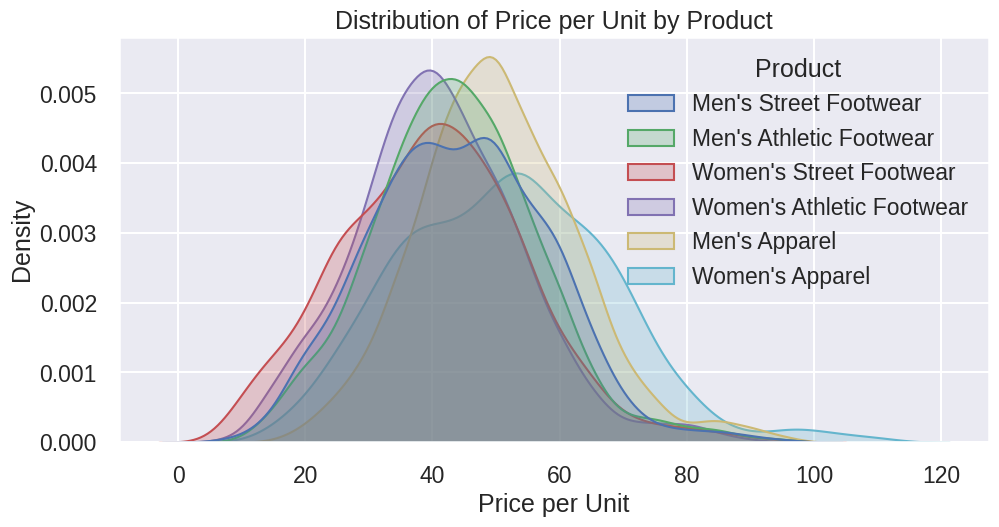

In [ ]:
cat_cols=['Region','Retailer','Product']
for col in cat_cols:
    plt.figure(figsize=(10,5))
    sns.kdeplot(data=df, x='Price per Unit', shade=True, hue=col)
    plt.title('Distribution of Price per Unit by '+col)
    plt.show()


In [ ]:
df["Invoice Date"]=pd.to_datetime(df['Invoice Date'], format='%Y-%m-%d')
df["Invoice Day Name"]=df["Invoice Date"].dt.day_name()
df["Day_Flag"]=np.where((df['Invoice Day Name']=="Sunday") | (df['Invoice Day Name']=="Saturday") ,"Weekend","Weekday")
df["Month"]=df["Invoice Date"].dt.month
df["Month Name"]=df["Invoice Date"].dt.month_name()
df.groupby(["Month","Month Name","Day_Flag"])["Total Sales"].sum().reset_index()[["Month Name","Day_Flag","Total Sales"]]
import plotly.express as px
px.bar(x=df.groupby(["Month","Month Name","Day_Flag"])["Total Sales"].sum().reset_index()["Month Name"],color=df.groupby(["Month","Month Name","Day_Flag"])["Total Sales"].sum().reset_index()["Day_Flag"],y=df.groupby(["Month","Month Name","Day_Flag"])["Total Sales"].sum().reset_index()["Total Sales"],barmode='group',title="Distribution of Total Sales across month on weekdays and weekends")




In [ ]:
df.rename(columns={'Total Sales': 'Total_Sales'}, inplace=True)


In [ ]:
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City', 'Product', 'Price per Unit', 'Units Sold', 'Total_Sales', 'Operating Profit', 'Operating Margin', 'Sales Method', 'year', 'month', 'day', 'date', 'Invoice Day Name', 'Day_Flag', 'Month', 'Month Name'], dtype='object')

In [ ]:
#Distribution number of transaction per age groups and gender
pd.crosstab([df.City, df.Retailer], df.Product, values=df.Total_Sales, aggfunc=(['sum']))








sum                                                                                                                
Product                   Men's Apparel Men's Athletic Footwear Men's Street Footwear Women's Apparel Women's Athletic Footwear Women's Street Footwear
City        Retailer                                                                                                                                   
Albany      Kohl's             640155.0                451449.0              677230.0        730986.0                  486574.0                706245.0
            West Gear         3233398.0               3378147.0             5096757.0       4048123.0                 2486437.0               2492303.0
Albuquerque Kohl's            2098480.0               3446593.0             3592123.0       3267518.0                 2141920.0               2519331.0
            Sports Direct      429864.0                356537.0              300030.0        601002.0                  440872.0                670746.0
Anchorage   Amazon            1587908.0               2182426.0             4086118.0       2681083.0                 1264856.0               1562634.0
...                                 ...                     ...                   ...             ...                       ...                     ...
St. Louis   West Gear          295680.0                217983.0              359958.0        352984.0                  192076.0                282452.0
Wichita     Foot Locker        497056.0                474131.0              956296.0        781724.0                  386016.0                425727.0
            Kohl's             907997.0                995147.0             1927212.0       1337094.0                  594029.0                690435.0
Wilmington  Foot Locker       1146226.0               1314167.0             2461767.0       1632697.0                  850826.0                981885.0
            Kohl's             480548.0                569992.0             1060430.0        887708.0                  391754.0                520412.0

[108 rows x 6 columns]

In [ ]:
pd.crosstab([df.City, df.Retailer], df.Product, values=df.Total_Sales, aggfunc=np.sum, normalize='columns').\
applymap(lambda x: "{0:.0f}%".format(100*x))


Product                   Men's Apparel Men's Athletic Footwear Men's Street Footwear Women's Apparel Women's Athletic Footwear Women's Street Footwear
City        Retailer                                                                                                                                   
Albany      Kohl's                   1%                      0%                    0%              0%                        0%                      1%
            West Gear                3%                      2%                    2%              2%                        2%                      2%
Albuquerque Kohl's                   2%                      2%                    2%              2%                        2%                      2%
            Sports Direct            0%                      0%                    0%              0%                        0%                      1%
Anchorage   Amazon                   1%                      1%                    2%              1%                        1%                      1%
...                                 ...                     ...                   ...             ...                       ...                     ...
St. Louis   West Gear                0%                      0%                    0%              0%                        0%                      0%
Wichita     Foot Locker              0%                      0%                    0%              0%                        0%                      0%
            Kohl's                   1%                      1%                    1%              1%                        1%                      1%
Wilmington  Foot Locker              1%                      1%                    1%              1%                        1%                      1%
            Kohl's                   0%                      0%                    1%              0%                        0%                      0%

[108 rows x 6 columns]

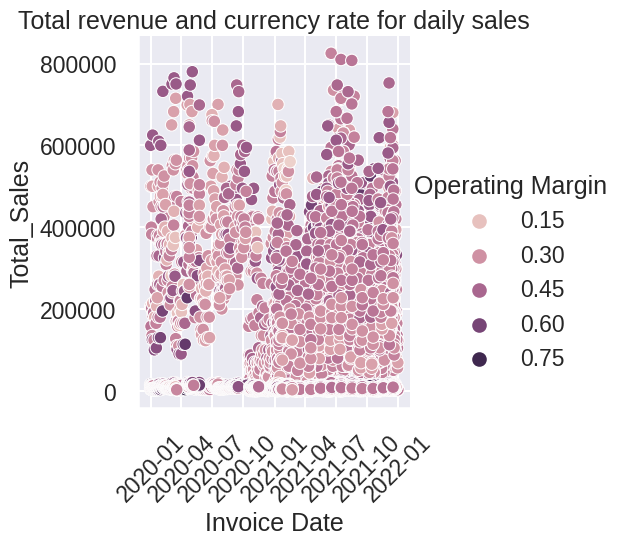

In [ ]:
# Plot relationship between total revenue and currency rate
sns.relplot(data=df, x='Invoice Date', y='Total_Sales', hue='Operating Margin')
plt.title('Total revenue and currency rate for daily sales')
plt.tick_params('x', labelrotation=45)